# Exploring Disney Land Wait Time Data Set
## Loading libraries and reading in data

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"

import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns
import imp
import matplotlib.dates as mdates

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

### Viewing the meta Dataset

In [2]:
print(meta.shape) #190 columns, 2674 rows of observations
#First five rows of meta, five columns, 
# start date 2012
meta.iloc[0:5, 0:10]

(2674, 190)


,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


## Merging datasets together to include wait times for Splash Mountain

In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [5]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [6]:
#Getting average wait times per day:

#find all posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

sum_by_day.head()

,date,SPOSTMIN
0,2012-01-01,37.727273
1,2012-01-02,43.750000
2,2012-01-03,5.000000
3,2012-01-04,17.142857
4,2012-01-05,41.153846


In [7]:
#Merging these wait times back into meta dataset and fill 0 for NA
#For splash 
meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name()
meta_splash2 = meta_splash2.fillna(0)
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0,Sunday,January
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0,Monday,January
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Tuesday,January
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Wednesday,January
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Thursday,January


### Correlation between SPOSTMIN & Predictors

In [8]:
## Running same code on all of metasplash_2
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.25].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 30 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419589
MKHOURSEMH            0.403368
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
WDWMAXTEMP            0.334935
EP09CAPACITY          0.323179
HSFIREWK              0.301307
YEAR                  0.297048
WDWMEANTEMP           0.284476
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
MKevent              -0.294647
MKEVENTSTREAK        -0.313447
MKEVENTSTREAK_F      -0.314338
Name: SPOSTMIN, 

## Visualizations

#### Wait time by Week 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

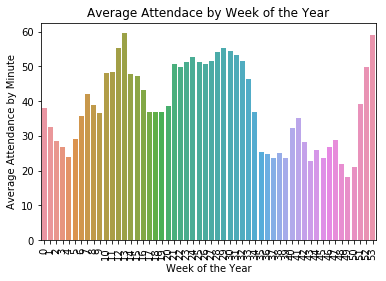

In [9]:
week_avg = meta_splash2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')
plt.xticks(rotation = 90)

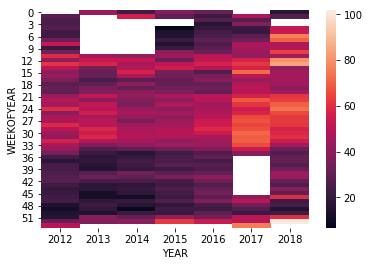

In [10]:
# Grouping by week and year

#aggregate by month
week_splash2 = meta_splash2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_splash2 = week_splash2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN").iloc[:,0:7]
ax = sns.heatmap(week_splash2)

#### Temperature vs Wait Time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

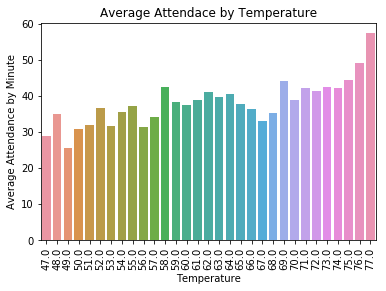

In [11]:
meta_splash2.WDWMINTEMP_mean = meta_splash2.WDWMINTEMP_mean.round()
avg_temp = meta_splash2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')
plt.xticks(rotation = 90)

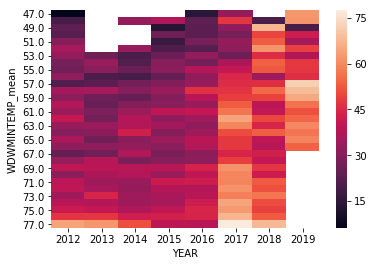

In [12]:
# Grouping by temperature and year

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
temp_splash2
ax = sns.heatmap(temp_splash2)

#### Park Hour vs Wait Time 

In [13]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([16., 15., 14., 13., 11., 12., 17., 10., 18., 24.,  9.,  8.])

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Park Hour')]

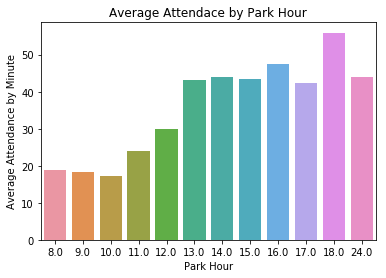

In [14]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Park Hour', ylabel='Average Attendance by Minute')

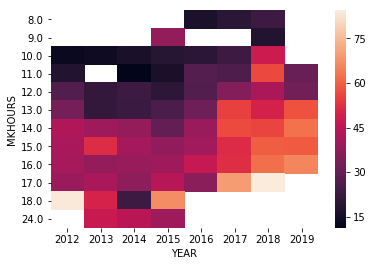

In [15]:
meta_splash3 = meta_splash2
meta_splash3.MKHOURS = meta_splash3.MKHOURS.round()
park_h_splash2 = meta_splash3.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_splash2 = park_h_splash2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_splash2)

#### Plotting Average Waittime by season

In [16]:
#Plotting by season
#First getting number of counts of observations per season:
print(meta_splash2.groupby('SEASON')['date'].count())

seasonal_splash = meta_splash2.groupby('SEASON')['SPOSTMIN'].mean().reset_index()
seasonal_splash

SEASON
CHRISTMAS                        108
CHRISTMAS PEAK                    43
COLUMBUS DAY                      24
EASTER                           152
FALL                             262
HALLOWEEN                         29
JERSEY WEEK                       60
JULY 4TH                          35
MARDI GRAS                        15
MARTIN LUTHER KING JUNIOR DAY     35
MEMORIAL DAY                      28
PRESIDENTS WEEK                   65
SEPTEMBER LOW                    174
SPRING                           688
SUMMER BREAK                     326
THANKSGIVING                      84
WINTER                           253
Name: date, dtype: int64


,SEASON,SPOSTMIN
0,CHRISTMAS,34.872556
1,CHRISTMAS PEAK,49.420553
2,COLUMBUS DAY,37.672452
3,EASTER,55.131450
4,FALL,25.488904
5,HALLOWEEN,23.272864
6,JERSEY WEEK,25.809633
7,JULY 4TH,53.198215
8,MARDI GRAS,44.983433
9,MARTIN LUTHER KING JUNIOR DAY,28.800624


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

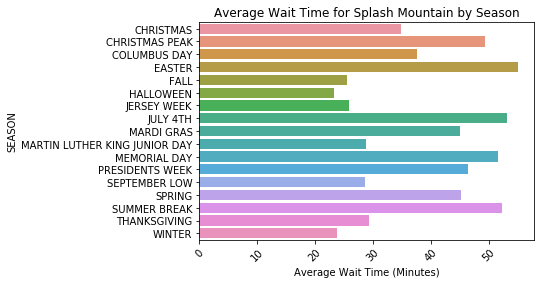

In [17]:
#Plot splash wait times by season:
ax = sns.barplot(x="SPOSTMIN", y = "SEASON", data = seasonal_splash)
ax.set(xlabel = 'Average Wait Time (Minutes)', ylabel = 'SEASON', title = 'Average Wait Time for Splash Mountain by Season')
plt.xticks(rotation = 45)

#### Average Wait Time Per Month for Splash Mountain Ride
We see that on average wait times are the longest during peak summer months of July, June

Text(0.5, 1.0, 'Splash Mountain Heatmap Month & Year')

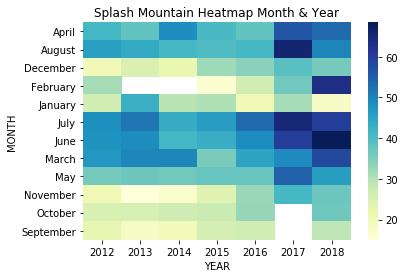

In [18]:
# Grouping by month and year

#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH', 'YEAR'])['SPOSTMIN'].mean().reset_index()
month_splash2 = month_splash2.pivot("MONTH", "YEAR", "SPOSTMIN").iloc[:,0:7] # Position based indexing

ax = sns.heatmap(month_splash2, cmap="YlGnBu")
ax.set_title('Splash Mountain Heatmap Month & Year')

White indicates when Magic Mountain was shut down for refurbishment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

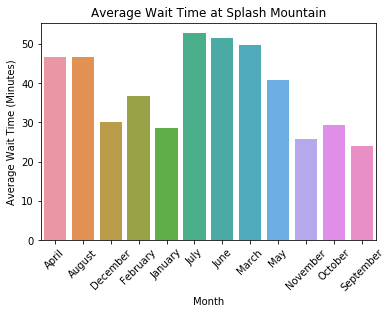

In [19]:
#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash2 = month_splash2.reset_index()

ax = sns.barplot(x="MONTH", y = "SPOSTMIN", data = month_splash2)
ax.set(xlabel = 'Month', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)

In [20]:
month_splash2.loc[month_splash2['SPOSTMIN'].idxmax()] #Row with max index

MONTH          July
SPOSTMIN    52.7566
Name: 5, dtype: object

The month of July has the longest wait time on average. Let's take a closer look of the Month of July!
#### Select July Only

count    217.000000
mean      52.756633
std       13.039936
min       19.500000
25%       43.376623
50%       51.958333
75%       61.481481
max       91.624204
Name: SPOSTMIN, dtype: float64


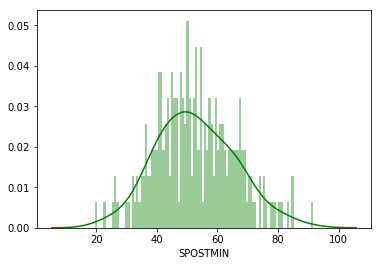

In [21]:
july = meta_splash2[meta_splash2['MONTH'] == "July"]
# Printing Wait Times

print(july['SPOSTMIN'].describe())
sns.distplot(july['SPOSTMIN'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [22]:
# How many Holidays in July?
july['HOLIDAYN'].drop_duplicates()

179      0
182    ind
Name: HOLIDAYN, dtype: object

Just one holiday in July, Indepdence Day. Lets look at hourly data on July 4th, Indepenence day!

In [23]:
# Longest Wait Time in July 4th of 2017
july.loc[july['SPOSTMIN'].idxmax(), 'SPOSTMIN']

91.62420382165605

In [24]:
## Finding Strongly Correlated Variables in July
july
july_corr = july.corr()['SPOSTMIN'][:-2] # -1 because the latest row is spostmin
golden_features_list = july_corr[abs(july_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list), golden_features_list))

There is 30 strongly correlated values with SPOSTMIN:
SPOSTMIN               1.000000
AKHOURSEMHYEST         0.489772
AKHOURSEMH             0.481589
HS20CAPACITY           0.460062
EP09CAPACITY           0.460062
AKHOURS                0.448709
AKHOURSYEST            0.446837
AKHOURSTOM             0.422477
AKHOURSEMHTOM          0.419154
YEAR                   0.391934
AKEMHETOM              0.386998
AKEMHEVE               0.386998
AKEMHEYEST             0.386998
CapacityLost_HS        0.365344
CapacityLostWGT_HS     0.360991
CapacityLost_EP        0.297201
CapacityLostWGT_EP     0.291402
MKDAYSSINCENONEVENT    0.285491
CapacityLostWGT_MK     0.253546
CapacityLost_MK        0.252166
HOLIDAY                0.225863
EPEMHMTOM              0.213546
EPHOURSEMHTOM          0.212326
MKPRDDAY               0.209673
AKEMHMTOM             -0.214564
MKHOURSEMHTOM         -0.222764
HSEMHEYEST            -0.229170
MKHOURSTOM            -0.274775
HSSHWNGT              -0.295154
MKPRDNGT          

#### Average Wait Time Per Day From 2012-2019 For Splash Mountain

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

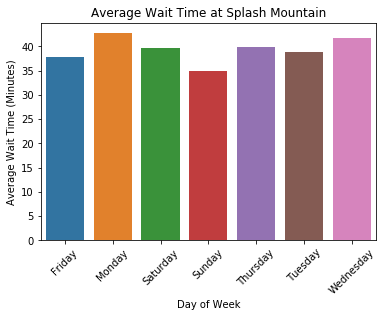

In [25]:
day_splash2 = meta_splash2.groupby('DAY')['SPOSTMIN'].mean()
day_splash2 = day_splash2.reset_index()

ax = sns.barplot(x="DAY", y = "SPOSTMIN", data = day_splash2)
ax.set(xlabel = 'Day of Week', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)

### Wait times in relation to other rides
#### Read in other rides wait time data and merge with meta:

In [26]:
#Merging each ride with meta_data, using date as key
#First need to change the date column to datetime so it can be merged with meta dataset.
pirates['date'] = pd.to_datetime(pirates['date'])
seven_dwarfs['date'] = pd.to_datetime(seven_dwarfs['date'])


In [27]:
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [28]:
#Deleting irrelevant columns for faster processing
filter_col = [col for col in meta_pirates if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates = meta_pirates.drop(filter_col,axis=1)

In [33]:
filter_col = [col for col in meta_dwarfs if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_dwarfs = meta_dwarfs.drop(filter_col,axis=1)

In [30]:
#Fill NA with 0
meta_pirates = meta_pirates.fillna(0)
meta_pirates.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,2012-01-01 10:14:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
1,2012-01-01,2012-01-01 12:13:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
2,2012-01-01,2012-01-01 13:50:00,10.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
3,2012-01-01,2012-01-01 14:42:00,10.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
4,2012-01-01,2012-01-01 20:40:00,5.0,0.0,0,1,0,1,1,2012,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular


In [34]:
#Need to separate into separate cells or kernal will die
meta_dwarfs = meta_dwarfs.fillna(0)
meta_dwarfs.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2013-06-04,2013-06-04 09:00:00,30.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
1,2013-06-04,2013-06-04 09:30:00,30.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
2,2013-06-04,2013-06-04 10:00:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
3,2013-06-04,2013-06-04 10:30:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular
4,2013-06-04,2013-06-04 11:00:00,60.0,0.0,0,3,154,22,6,2013,...,0,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,0,Wishes Nighttime Spectacular


In [36]:
print(meta_pirates.shape, meta_dwarfs.shape)

(266897, 100) (226493, 100)


In [38]:
#Creating new datasets, only selecting specific columns, and adding a ride specification column
pirateswait = meta_pirates[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
pirateswait['Ride'] = 'Pirates'
dwarfswait = meta_dwarfs[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
dwarfswait['Ride'] = 'Seven Dwarfs'
splashwait = meta_splash[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
splashwait['Ride'] = 'Splash Mountain'
splashwait.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,CHRISTMAS PEAK,2012,Splash Mountain


In [39]:
#Combine all three rides into one dataset to plot their wait times against each other
allrides = pd.concat([pirateswait, dwarfswait, splashwait])
allrides['datetime'] = pd.to_datetime(allrides['datetime'], infer_datetime_format=True)
allrides.shape

(740512, 7)

Pirates            157
Splash Mountain    124
Seven Dwarfs       123
Name: Ride, dtype: int64


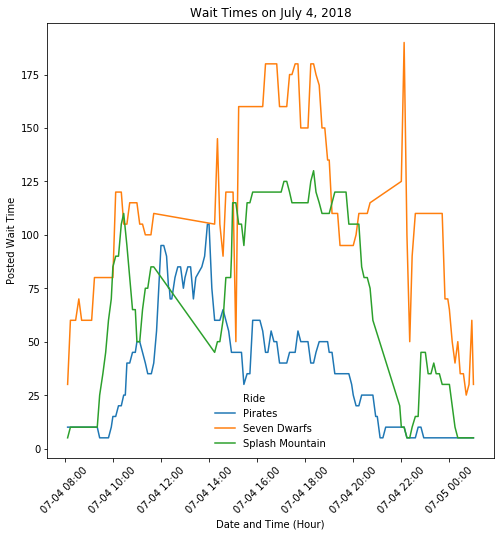

In [43]:
#Plot for July 4th of 2018
july = allrides.loc[(allrides.date == "2018-7-4")]

print(july['Ride'].value_counts())

plt.figure(figsize=(8,8))
ax = sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", data=july)
plt.xticks(rotation = 45)
ax.set(xlabel="Date and Time (Hour)", ylabel="Posted Wait Time")
ax.set(title="Wait Times on July 4, 2018")
myFmt = mdates.DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc='lower center', frameon=False)


##### Now, looking at july 4th wait times for each year, to compare against each other.

In [45]:
#Getting only july fourth dates for all years for all rides
july4th = allrides.loc[(allrides.date.dt.day == 4) & (allrides.date.dt.month == 7)]
print(july4th.shape)
july4th.head(5)

(2302, 7)


,date,datetime,SPOSTMIN,SACTMIN,SEASON,YEAR,Ride
1480,2012-07-04,2012-07-04 11:51:00,20.0,0.0,JULY 4TH,2012,Pirates
1481,2012-07-04,2012-07-04 11:57:00,20.0,0.0,JULY 4TH,2012,Pirates
1482,2012-07-04,2012-07-04 12:26:00,40.0,0.0,JULY 4TH,2012,Pirates
1483,2012-07-04,2012-07-04 19:21:00,40.0,0.0,JULY 4TH,2012,Pirates
28845,2013-07-04,2013-07-04 08:14:00,5.0,0.0,JULY 4TH,2013,Pirates


In [46]:
july4th['YEAR'].value_counts()

2017    422
2014    421
2016    405
2018    404
2015    357
2013    282
2012     11
Name: YEAR, dtype: int64

Only 11 observations for 2012.

In [50]:
#Split by year
july2012, july2013, july2014, july2015, july2016, july2017, july2018 = [x for _, x in july4th.groupby('YEAR')]

Text(0.5, 1.0, 'Posted Wait Times on July 4, 2018')

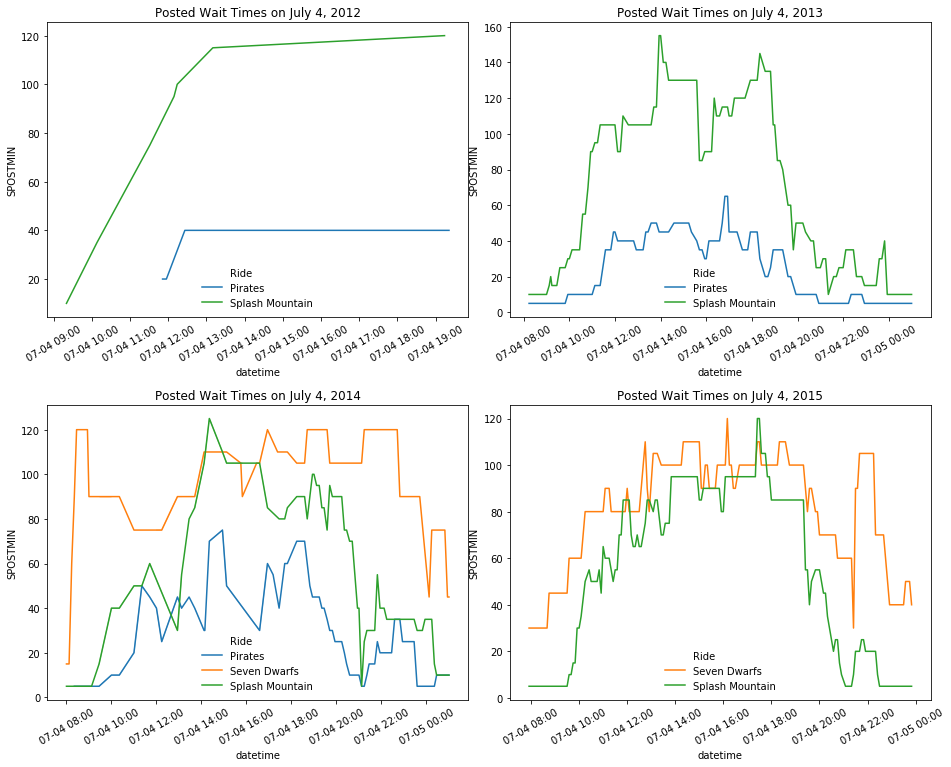

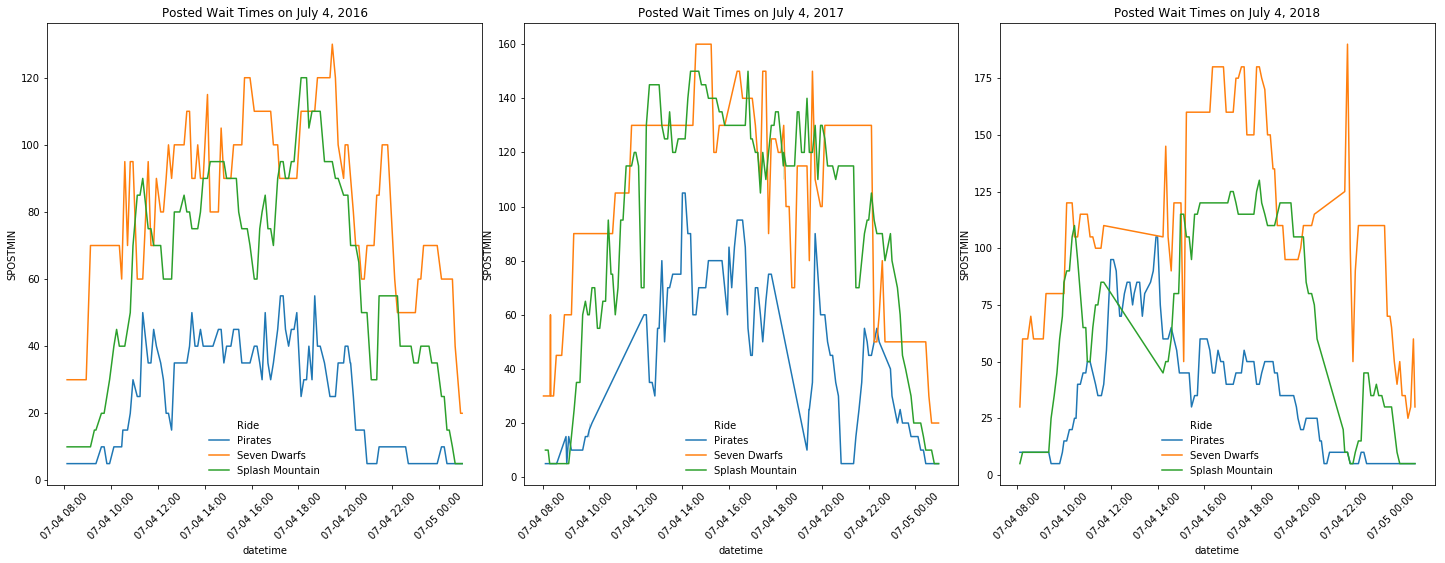

In [53]:
palette ={"Pirates":"C0","Seven Dwarfs":"C1","Splash Mountain":"C2"}

fig, ax = plt.subplots(2, 2, figsize=(13,10))
fig.tight_layout()
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2012, ax = ax[0,0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2013, ax = ax[0,1])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2014, ax = ax[1,0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2015, ax = ax[1,1])
plt.subplots_adjust(hspace = 0.3)
fig.show()

for i in range(4):
    ax[i//2, i % 2].legend(loc='lower center', frameon=False)
    myFmt = mdates.DateFormatter('%m-%d %H:%M')
    ax[i//2, i % 2].xaxis.set_major_formatter(myFmt)
    for tick in ax[i//2, i % 2].get_xticklabels():
        tick.set_rotation(30)
        
ax[0,0].set_title('Posted Wait Times on July 4, 2012')
ax[0,1].set_title('Posted Wait Times on July 4, 2013')
ax[1,0].set_title('Posted Wait Times on July 4, 2014')
ax[1,1].set_title('Posted Wait Times on July 4, 2015')


#fig, ax = plt.subplots(1, 3, figsize=(13,7))
fig, ax = plt.subplots(1, 3, figsize=(20,7))
fig.tight_layout()
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette,  data=july2016, ax = ax[0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2017, ax = ax[1])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2018, ax = ax[2])
for i in range(3):
    ax[i].legend(loc='lower center', frameon=False)
    myFmt = mdates.DateFormatter('%m-%d %H:%M')
    ax[i].xaxis.set_major_formatter(myFmt)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

ax[0].set_title('Posted Wait Times on July 4, 2016')
ax[1].set_title('Posted Wait Times on July 4, 2017')
ax[2].set_title('Posted Wait Times on July 4, 2018')

In [71]:
#Seeing the maximum posted wait time per ride per year
july2012max = july2012.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2013max = july2013.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2014max = july2014.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2015max = july2015.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2016max = july2016.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2017max = july2017.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2018max = july2018.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()

dfs = [july2012max,july2013max,july2014max,july2015max,july2016max,july2017max,july2018max]
years = ['2012','2013','2014','2015','2016','2017','2018']
df_keys = pd.concat(dfs, keys= years)
df_keys

Ride  SPOSTMIN
2012 0          Pirates      40.0
     1  Splash Mountain     120.0
2013 0          Pirates      65.0
     1  Splash Mountain     155.0
2014 0          Pirates      75.0
     1     Seven Dwarfs     120.0
     2  Splash Mountain     125.0
2015 0     Seven Dwarfs     120.0
     1  Splash Mountain     120.0
2016 0          Pirates      55.0
     1     Seven Dwarfs     130.0
     2  Splash Mountain     120.0
2017 0          Pirates     105.0
     1     Seven Dwarfs     160.0
     2  Splash Mountain     150.0
2018 0          Pirates     105.0
     1     Seven Dwarfs     190.0
     2  Splash Mountain     130.0

### Time Series 
#### Plotting Average Wait Time per day by Year

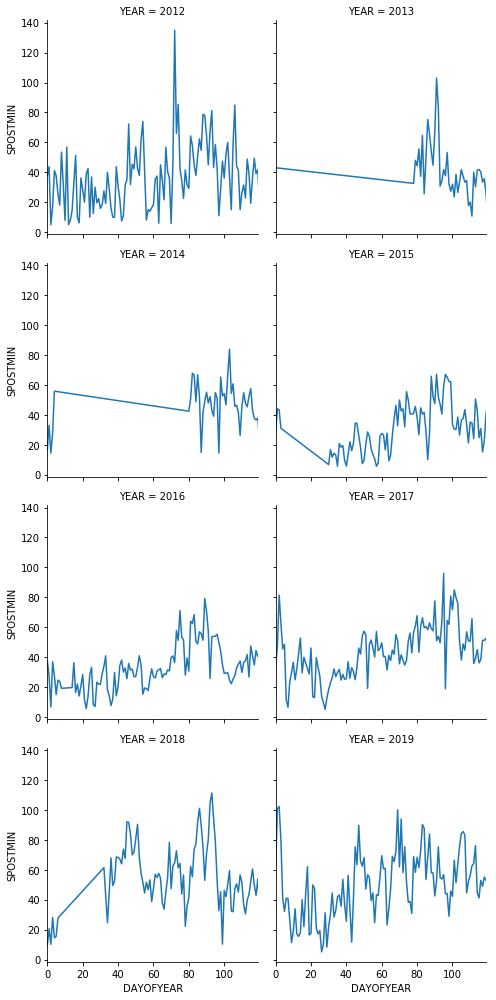

In [27]:
avg = meta_splash2
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

ax = sns.FacetGrid(avg, col="YEAR",col_wrap=2, height=3.5)
ax = ax.map_dataframe(dateplot, "DAYOFYEAR", "SPOSTMIN")

In [28]:
print(avg.groupby('YEAR')['date'].count())

YEAR
2012    362
2013    288
2014    289
2015    339
2016    359
2017    284
2018    340
2019    120
Name: date, dtype: int64
